In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# Download historical stock data for a specific ticker
ticker = 'AAPL'

# Get today's date in the format "YYYY-MM-DD"
today = datetime.today().strftime('%Y-%m-%d')

stock_data = yf.download(ticker, start='2024-03-01', end='2024-03-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(stock_data)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-03-01,178.815674,179.681580,176.546390,178.706190,73488000
2024-03-04,174.277084,176.068613,172.973228,175.322137,81510100
2024-03-05,169.320511,171.231486,168.822861,169.957503,95132400
2024-03-06,168.325180,170.435227,167.887245,170.256065,68587700
2024-03-07,168.205765,169.927630,167.698167,168.355054,71765100
2024-03-08,169.927643,172.883686,168.146062,168.205777,76114600
2024-03-11,171.938141,173.560485,171.241434,172.127250,60139500
2024-03-12,172.415863,173.212106,170.206295,172.336237,59825400


In [4]:
print("Number of open trading days in market: ", len(stock_data))

Number of open trading days in market:  20


In [5]:
stock_close_prices = stock_data['Close']

In [6]:
def evaluate_trade_period(prices, period_length):
    investments = []
    prices_values = stock_close_prices.values
    if period_length >= len(prices) or period_length <= 0:
        raise ValueError("period_length should be less than len(prices) and bigger than 0")
        
    result_list = []
    for i in range(0, len(prices_values)-period_length, 1):
        buy_price = prices_values[i][0]
        investments.append(buy_price)
        sell_price = prices_values[i+period_length][0]
        result_list.append(float(sell_price-buy_price))
        
    return np.array(result_list), np.array(investments)

In [7]:
result_list, investments = evaluate_trade_period(stock_close_prices, period_length=1)

print(f"Number of all Buy/Sell Pairs (periods): {len(result_list)}")
print(f"Sum of all Buy/Sell Pairs (periods): {sum(result_list)}")
print(f"Number of investments: {len(investments)}")
print(f"Sum of investments: {sum(investments)}")
print()

positive_results = result_list[result_list > 0]
print(f"Number of Pairs (periods) with positive result (win): {len(positive_results)}")
print(f"Sum of Pairs (periods) with positive result (win): {sum(positive_results)}")
print()

negative_results = result_list[result_list < 0]
print(f"Number of Pairs (periods) with negative result (lost): {len(negative_results)}")
print(f"Sum of Pairs (periods) with negative result (lost): {sum(negative_results)}")
print()

Number of all Buy/Sell Pairs (periods): 19
Sum of all Buy/Sell Pairs (periods): -8.141571044921875
Number of investments: 19
Sum of investments: 3267.023666381836

Number of Pairs (periods) with positive result (win): 9
Sum of Pairs (periods) with positive result (win): 16.581634521484375

Number of Pairs (periods) with negative result (lost): 10
Sum of Pairs (periods) with negative result (lost): -24.72320556640625



In [8]:
period_lengths, corresponding_results = [], []
for i in range(1, len(stock_close_prices), 1):
    result_list, investments = evaluate_trade_period(stock_close_prices, period_length=i)
    period_lengths.append(i)
    corresponding_results.append(sum(result_list))

    print(f"Length of period: {i}")
    print(f"Number of all Buy/Sell Pairs (periods): {len(result_list)}")
    print(f"Sum of all Buy/Sell Pairs (periods): {sum(result_list)}")
    print(f"Number of investments: {len(investments)}")
    print(f"Sum of investments: {sum(investments)}")
    print()
    
    positive_results = result_list[result_list > 0]
    print(f"Number of Pairs (periods) with positive result (win): {len(positive_results)}")
    print(f"Sum of Pairs (periods) with positive result (win): {sum(positive_results)}")
    print()
    
    negative_results = result_list[result_list < 0]
    print(f"Number of Pairs (periods) with negative result (lost): {len(negative_results)}")
    print(f"Sum of Pairs (periods) with negative result (lost): {sum(negative_results)}")
    print()
    print("------------------------------------------------------")

Length of period: 1
Number of all Buy/Sell Pairs (periods): 19
Sum of all Buy/Sell Pairs (periods): -8.141571044921875
Number of investments: 19
Sum of investments: 3267.023666381836

Number of Pairs (periods) with positive result (win): 9
Sum of Pairs (periods) with positive result (win): 16.581634521484375

Number of Pairs (periods) with negative result (lost): 10
Sum of Pairs (periods) with negative result (lost): -24.72320556640625

------------------------------------------------------
Length of period: 2
Number of all Buy/Sell Pairs (periods): 18
Sum of all Buy/Sell Pairs (periods): -9.92315673828125
Number of investments: 18
Sum of investments: 3094.5281677246094

Number of Pairs (periods) with positive result (win): 9
Sum of Pairs (periods) with positive result (win): 22.603256225585938

Number of Pairs (periods) with negative result (lost): 9
Sum of Pairs (periods) with negative result (lost): -32.52641296386719

------------------------------------------------------
Length of

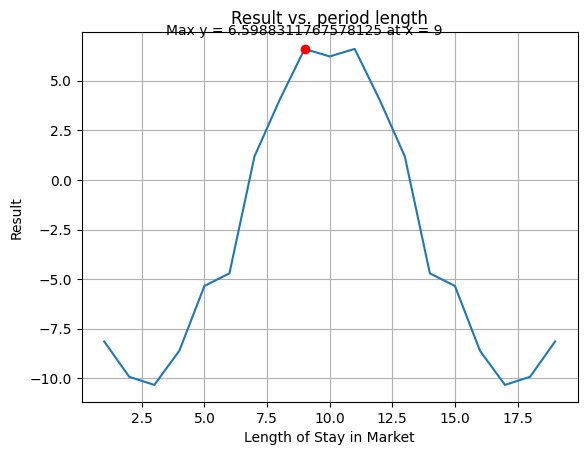

In [9]:
import matplotlib.pyplot as plt

# Creating the plot
plt.plot(period_lengths, corresponding_results)

# Adding title and labels
plt.title("Result vs. period length")
plt.xlabel("Length of Stay in Market")
plt.ylabel("Result")

# Enabling grid
plt.grid(True)

# Finding the maximum y value and its corresponding x
max_y = max(corresponding_results)
max_x = period_lengths[corresponding_results.index(max_y)]

# Plotting the maximum y value
plt.plot(max_x, max_y, 'ro')  # 'ro' stands for red circle marker

# Annotating the maximum y value and corresponding x value
plt.annotate(f'Max y = {max_y} at x = {max_x}', 
             (max_x, max_y), 
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center')

# Display the plot
plt.show()

In [10]:
result_list, investments = evaluate_trade_period(stock_close_prices, period_length=max_x)

print(f"Period length (stay in market): {max_x}")
print(f"Max Result: {max_y}")
print()

print(f"Number of all Buy/Sell Pairs (periods): {len(result_list)}")
print(f"Sum of all Buy/Sell Pairs (periods): {sum(result_list)}")
print(f"Number of investments: {len(investments)}")
print(f"Sum of investments: {sum(investments)}")
print()

positive_results = result_list[result_list > 0]
print(f"Number of Pairs (periods) with positive result (win): {len(positive_results)}")
print(f"Sum of Pairs (periods) with positive result (win): {sum(positive_results)}")
print()

negative_results = result_list[result_list < 0]
print(f"Number of Pairs (periods) with negative result (lost): {len(negative_results)}")
print(f"Sum of Pairs (periods) with negative result (lost): {sum(negative_results)}")
print()

Period length (stay in market): 9
Max Result: 6.5988311767578125

Number of all Buy/Sell Pairs (periods): 11
Sum of all Buy/Sell Pairs (periods): 6.5988311767578125
Number of investments: 11
Sum of investments: 1887.5473175048828

Number of Pairs (periods) with positive result (win): 5
Sum of Pairs (periods) with positive result (win): 21.080459594726562

Number of Pairs (periods) with negative result (lost): 6
Sum of Pairs (periods) with negative result (lost): -14.48162841796875



In [11]:
total_investement = sum(investments)

share_return = round((max_y/total_investement) * 100, 2) 

print("Invested: ", total_investement)
print("Lost/Win: ", max_y)
print(f"Share Return: {share_return} %")

Invested:  1887.5473175048828
Lost/Win:  6.5988311767578125
Share Return: 0.35 %


In [12]:
buy_price_at_start = stock_close_prices.values[0][0]
bought_shares = total_investement/buy_price_at_start
sell_price_at_end = stock_close_prices.values[len(stock_close_prices)-1][0]
profit = (bought_shares*sell_price_at_end) - (bought_shares*buy_price_at_start)

print("One-time Investment: ", total_investement)
print("One-time Investment - Lost/Win: ", profit)
print(f"One-time Investment Share Return: {(profit/total_investement) * 100} %")

One-time Investment:  1887.5473175048828
One-time Investment - Lost/Win:  -85.94101544414298
One-time Investment Share Return: -4.553052241241135 %
